In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load Dataset
dataset = pd.read_csv("/content/Harvest_Prediction_Factors_Merged.csv")
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rainfall (mm)            10000 non-null  float64
 1   Temperature (°C)         10000 non-null  float64
 2   Relative Humidity (%)    10000 non-null  float64
 3   Sunshine Hours (hrs)     10000 non-null  float64
 4   Wind Speed (km/h)        10000 non-null  float64
 5   Soil Type                10000 non-null  object 
 6   Irrigation Type          10000 non-null  object 
 7   Water Source             10000 non-null  object 
 8   Paddy Variety            10000 non-null  object 
 9   Fertilizer Usage (kg)    10000 non-null  float64
 10  Area (hectare)           10000 non-null  float64
 11  Soil Nitrogen (mg/kg)    10000 non-null  int64  
 12  Soil Phosphorus (mg/kg)  10000 non-null  int64  
 13  Soil Potassium (mg/kg)   10000 non-null  int64  
 14  Pest Severity          

In [3]:
# Feature Selection
X = dataset.drop(columns=[' Yield (kg)'])
y = dataset[' Yield (kg)']

In [4]:
# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [5]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Model Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Model Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 513.2266009999996
MSE: 5035193.729185276
R2 Score: 0.9714992785030225


In [31]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")

evaluate_model(y_test, y_pred)


Mean Absolute Error (MAE): 513.23
Mean Squared Error (MSE): 5035193.73
Root Mean Squared Error (RMSE): 2243.92
R-Squared (R²): 0.97


In [6]:
from sklearn.metrics import r2_score

# Predict on training data
y_train_pred = model.predict(X_train)

# Predict on testing data
y_test_pred = model.predict(X_test)

# Calculate R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Results
print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Testing Data: {r2_test:.4f}")


R² Score on Training Data: 0.9971
R² Score on Testing Data: 0.9715


In [10]:
import pandas as pd

# User Input Prediction
def predict_total_harvest():
    user_data = {
        'Paddy Variety': input("Enter Paddy Variety: "),
        'Soil Type': input("Enter Soil Type: "),
        'Temperature (°C)': float(input("Enter Temperature (°C): ")),
        'Humidity (%)': float(input("Enter Humidity (%): ")),
        'Rainfall (mm)': float(input("Enter Rainfall (mm): ")),
        'Fertilizer Used (kg)': float(input("Enter Fertilizer Used (kg): ")),
        'Pesticide Used (kg)': float(input("Enter Pesticide Used (kg): ")),
        'Wind Speed (km/h)': float(input("Enter Wind Speed (km/h): ")),  # New input
        'Relative Humidity (%)': float(input("Enter Relative Humidity (%): ")),  # New input
        'Irrigation Type': input("Enter Irrigation Type: "),  # New input
        'Soil Phosphorus (mg/kg)': float(input("Enter Soil Phosphorus (mg/kg): ")),  # New input
        'Water Source': input("Enter Water Source: "),  # New input
        'Soil Nitrogen (mg/kg)': float(input("Enter Soil Nitrogen (mg/kg): ")),  # New input
        'District': input("Enter District: "),  # New input
        'Sunshine Hours (hrs)': float(input("Enter Sunshine Hours (hrs): ")),  # New input
        'Soil Potassium (mg/kg)': float(input("Enter Soil Potassium (mg/kg): ")),  # New input
        'Season': input("Enter Season: "),  # New input
        'Pest Severity': input("Enter Pest Severity: "),  # New input
        'Area (hectare)': float(input("Enter Area (hectare): ")),  # New input
        'Fertilizer Usage (kg)': float(input("Enter Fertilizer Usage (kg): ")),  # New input
        'Previous Yield (kg/ha)': float(input("Enter Previous Yield (kg/ha): "))
    }

    user_df = pd.DataFrame([user_data])

    print("=========================")

    # Assuming `model` is the trained model you're using
    predicted_yield = model.predict(user_df)[0]
    previous_yield = user_data['Previous Yield (kg/ha)']

    print("=========================")
    print(f"Predicted Harvest Yield: {predicted_yield:.2f} kg")


    print("=========================")
    print("=========================")
    if previous_yield > predicted_yield:
        print("⚠️ Warning: Your predicted yield is lower than the previous yield.")
        print("Consider adjusting soil quality, using better fertilizers, and optimizing irrigation.")
        print("- Optimize fertilizer usage based on soil tests.")
        print("- Improve irrigation practices to ensure consistent water supply.")
        print("- Consider pest control measures to minimize yield loss.")
        print("- Use high-yield paddy varieties suitable for the district.")
        print("- Apply balanced soil nutrients and organic matter.")
    else:
        print("✅ Your yield is expected to be stable or improve!")
        print("Recommendations for Maintaining or Further Improving Yield:")
        print("- Continue current agricultural practices.")
        print("- Monitor soil health regularly and apply nutrients accordingly.")
        print("- Use precision farming tools to track crop progress.")
        print("- Plan for seasonal crop rotation to maintain soil fertility.")
        print("- Use modern harvesting techniques to minimize post-harvest losses.")


# Run User Prediction Function
predict_total_harvest()


Enter Paddy Variety: BG 450
Enter Soil Type: Sandy
Enter Temperature (°C): 34
Enter Humidity (%): 56
Enter Rainfall (mm): 56
Enter Fertilizer Used (kg): 78
Enter Pesticide Used (kg): 89
Enter Wind Speed (km/h): 23
Enter Relative Humidity (%): 67
Enter Irrigation Type: Rainfed
Enter Soil Phosphorus (mg/kg): 78
Enter Water Source: well
Enter Soil Nitrogen (mg/kg): 78
Enter District: Puttalam
Enter Sunshine Hours (hrs): 12
Enter Soil Potassium (mg/kg): 67
Enter Season: Yala
Enter Pest Severity: 67
Enter Area (hectare): 45
Enter Fertilizer Usage (kg): 67
Enter Previous Yield (kg/ha): 3456
Predicted Harvest Yield: 37109.57 kg
✅ Your yield is expected to be stable or improve!
Recommendations for Maintaining or Further Improving Yield:
- Continue current agricultural practices.
- Monitor soil health regularly and apply nutrients accordingly.
- Use precision farming tools to track crop progress.
- Plan for seasonal crop rotation to maintain soil fertility.
- Use modern harvesting techniques to

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Model Performance Visualization**

 Actual vs. Predicted Scatter Plot

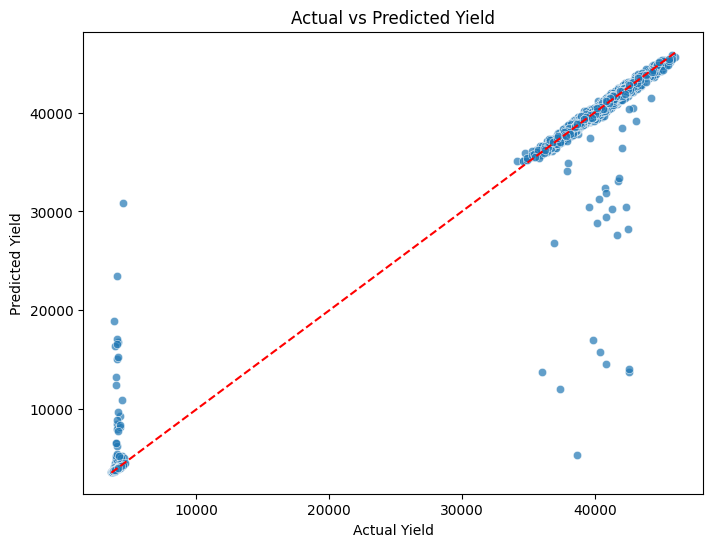

In [12]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("Actual Yield")
    plt.ylabel("Predicted Yield")
    plt.title("Actual vs Predicted Yield")
    plt.show()

# Assuming 'y_test' and 'y_pred' are the true and predicted values
plot_actual_vs_predicted(y_test, y_pred)


Residual Plot (Error Analysis)


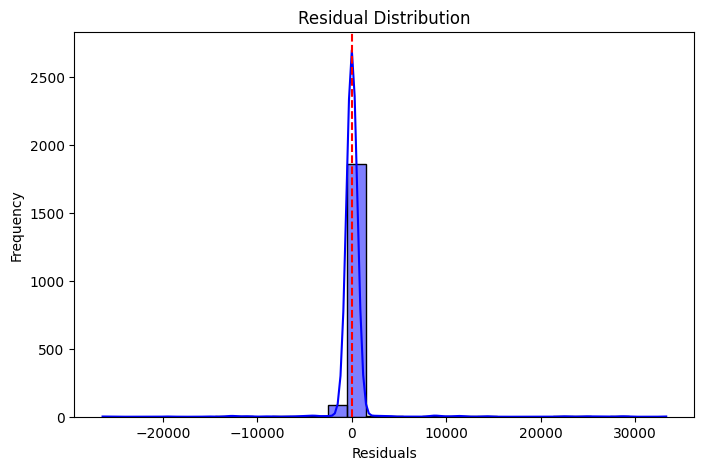

In [13]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=30, kde=True, color='blue')
    plt.axvline(x=0, color="red", linestyle="--")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.show()

plot_residuals(y_test, y_pred)


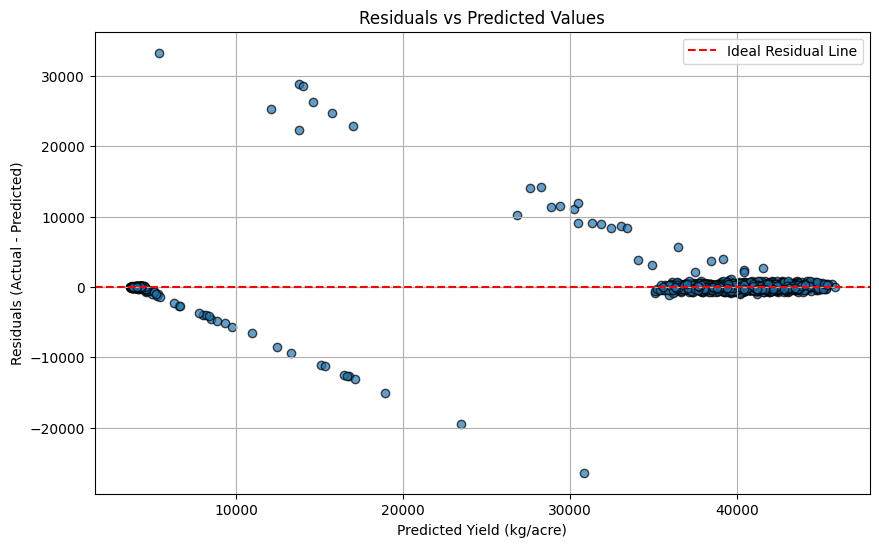

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred



# Residuals vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label="Ideal Residual Line")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Yield (kg/acre)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.svm import SVR

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))  # or 'linear', 'poly' etc.
])


In [25]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Rainfall (mm)', 'Temperature (°C)', 'Relative Humidity (%)',
       'Sunshine Hours (hrs)', 'Wind Speed (km/h)', 'Fertilizer Usage (kg)',
       'Area (hectare)', 'Soil Nitrogen (mg/kg)', 'Soil Phosphorus (mg/kg)',
       'Soil Potassium (mg/kg)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Soil Type', 'Irrigation Type', 'Water Source', 'Paddy Variety',
       'Pest Severity', 'Season', 'District'],
      dtype='object'))])),
                ('regressor', SVR())])

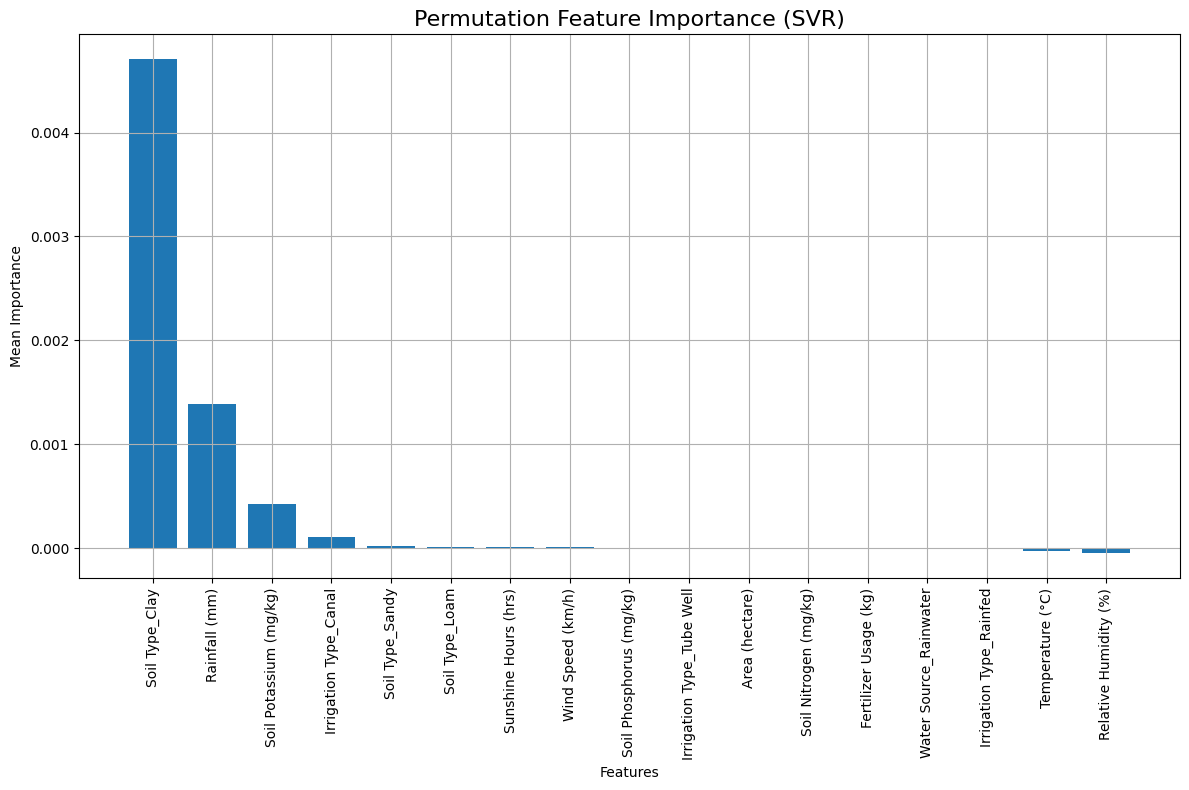

In [26]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Perform permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

# Get feature names after preprocessing
categorical_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, categorical_feature_names])

# Sort results
sorted_idx = result.importances_mean.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), all_feature_names[sorted_idx], rotation=90)
plt.title("Permutation Feature Importance (SVR)", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Mean Importance")
plt.tight_layout()
plt.grid(True)
plt.show()


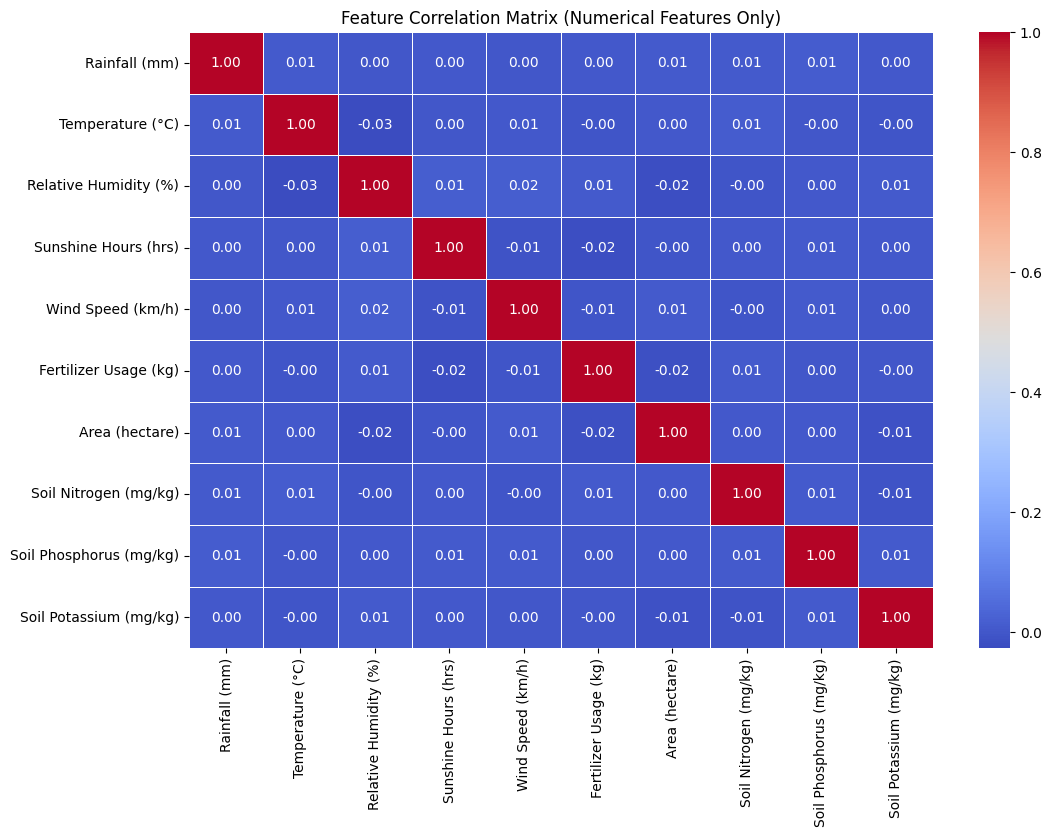

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
X_numerical = X.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = X_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix (Numerical Features Only)")
plt.show()


In [ ]:
import pickle

# Save the model
with open('svr_paddy_yield_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully using pickle!")


Model saved successfully using pickle!


In [ ]:
# Load the model
with open('svr_paddy_yield_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!
